In [1]:
# REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
import unicodedata
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
from nltk.stem.porter import *
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# LOADING THE TRAINING AND TESTING DATASET
train = pd.read_csv("train.csv", encoding='latin1')
test = pd.read_csv('test.csv')
print(train.shape)
print(test.shape)

(7920, 3)
(1953, 2)


In [3]:
print('%.2f percents of tweets are positives'%(train.label.sum()*100/len(train)))

25.58 percents of tweets are positives


In [4]:
train.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [5]:
# joing both train and test data in order to perform cleaning of tweets
new = train.append(test, ignore_index=True)  # NEW is the combined data

C:\Users\AKSHIT\Anaconda2\lib\site-packages\pandas\core\frame.py:7116: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [6]:
#REMOVE_PATTERN FUNCTION IS USED TO CLEAN TWEET FROM MENTION:  @
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  
new['clean_tweet'] = np.vectorize(remove_pattern)(new['tweet'], "@[\w]*") 
# MAKING A NEW COLUMN clean_tweet IN ORDER TO COMPARE 

In [7]:
# CHECKING REMOVED DATA 
new.head() 

,id,label,tweet,clean_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case ^^ Thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...,We love this! Would you go? #talk #makememorie...
3,4,0.0,I'm wired I know I'm George I was made that wa...,I'm wired I know I'm George I was made that wa...
4,5,1.0,What amazing service! Apple won't even talk to...,What amazing service! Apple won't even talk to...


In [8]:
# REPLACING NUMBERS, SPECIAL CHARACTERS AND PUNCTUATIONS FROM THE TWEETS
new['clean_tweet'] = new['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
new.head()

,id,label,tweet,clean_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test https goo gl h ...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case Thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...,We love this Would you go #talk #makememorie...
3,4,0.0,I'm wired I know I'm George I was made that wa...,I m wired I know I m George I was made that wa...
4,5,1.0,What amazing service! Apple won't even talk to...,What amazing service Apple won t even talk to...


In [9]:
# CLEANING SHORT WORDS LIKE ooo, hmmmm, awww, oh, etc.
new['clean_tweet'] = new['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
new.head()

,id,label,tweet,clean_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test https MfQV #andro...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally transparant silicon case Thanks uncle ...
2,3,0.0,We love this! Would you go? #talk #makememorie...,love this Would #talk #makememories #unplug #r...
3,4,0.0,I'm wired I know I'm George I was made that wa...,wired know George made that #iphone #cute #dav...
4,5,1.0,What amazing service! Apple won't even talk to...,What amazing service Apple even talk about que...


In [10]:
# SPLITTING STRINGS OF TWEETS INTO TOKEN BY TOKENIZTION
token_tweet = new['clean_tweet'].apply(lambda x: x.split())
token_tweet.head()

0    [#fingerprint, #Pregnancy, Test, https, MfQV, ...
1    [Finally, transparant, silicon, case, Thanks, ...
2    [love, this, Would, #talk, #makememories, #unp...
3    [wired, know, George, made, that, #iphone, #cu...
4    [What, amazing, service, Apple, even, talk, ab...
Name: clean_tweet, dtype: object

In [11]:
# Removing suffixes from the tweets
# Appyling stemming
Ps = PorterStemmer()
token_tweet = token_tweet.apply(lambda x: [Ps.stem(i) for i in x]) 
token_tweet.head()

0    [#fingerprint, #pregnanc, test, http, mfqv, #a...
1    [final, transpar, silicon, case, thank, uncl, ...
2    [love, thi, would, #talk, #makememori, #unplug...
3    [wire, know, georg, made, that, #iphon, #cute,...
4    [what, amaz, servic, appl, even, talk, about, ...
Name: clean_tweet, dtype: object

In [12]:
# after removing suffix ; # patching tweets back together
for i in range(len(token_tweet)):
    token_tweet[i] = ' '.join(token_tweet[i])

new['clean_tweet'] = token_tweet

In [13]:
new.head()

,id,label,tweet,clean_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #pregnanc test http mfqv #android...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,final transpar silicon case thank uncl #yay #s...
2,3,0.0,We love this! Would you go? #talk #makememorie...,love thi would #talk #makememori #unplug #rela...
3,4,0.0,I'm wired I know I'm George I was made that wa...,wire know georg made that #iphon #cute #davent...
4,5,1.0,What amazing service! Apple won't even talk to...,what amaz servic appl even talk about question...


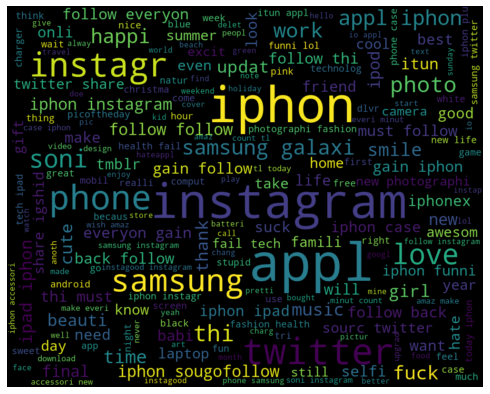

In [14]:
# VISUALIZTION USING WORD CLOUD
# MOST FREQUENT APPEARING WORDS IN THE DATA
words = ' '.join([text for text in new['clean_tweet']])
wordcloud = WordCloud(width=1000, height=800, random_state=21, max_font_size=110).generate(words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

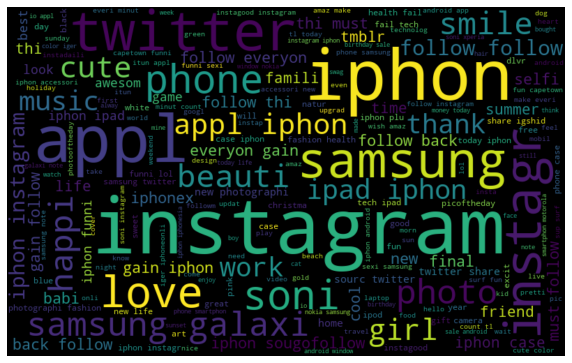

In [15]:
# MOST FREQUENT APPEARING POSTITVE WORDS IN THE DATA
positive_words =' '.join([text for text in new['clean_tweet'][new['label'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

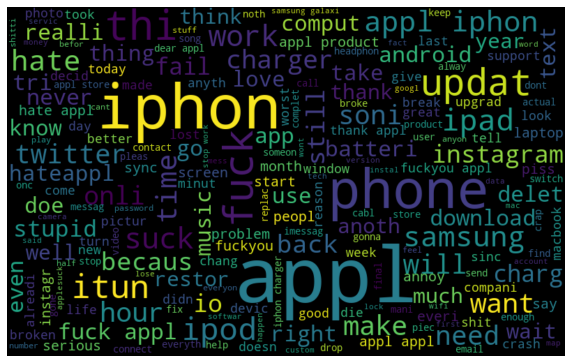

In [16]:
# MOST FREQUENT APPEARING NEGATIVE WORDS IN THE DATA
negative_words =' '.join([text for text in new['clean_tweet'][new['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [17]:
# FUNCTION IN ORDER TO COLLECT HASHTAGS AND VISUALIZE THEIR IMPACT
def hashtag(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

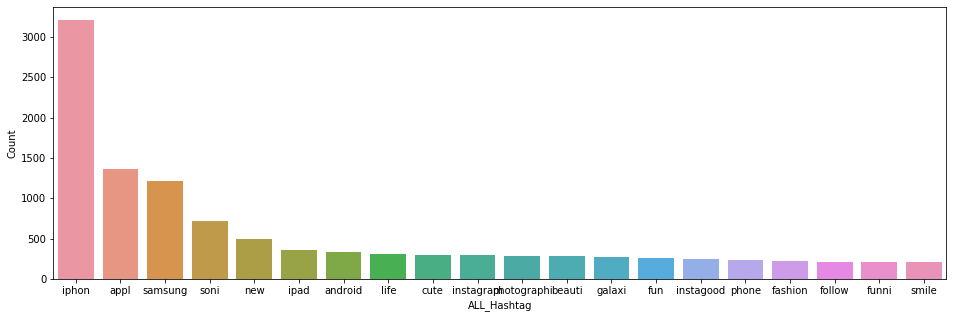

In [18]:
# ALL HASHTAGS FROM TWEETS
HT_all = hashtag(new['clean_tweet'][new['label'] == 0])
HT_all = sum(HT_all,[])
# PLOTTING THE LIST
a = nltk.FreqDist(HT_all)
d = pd.DataFrame({'ALL_Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# top 20 most frequent positive hashtags in the data     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "ALL_Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

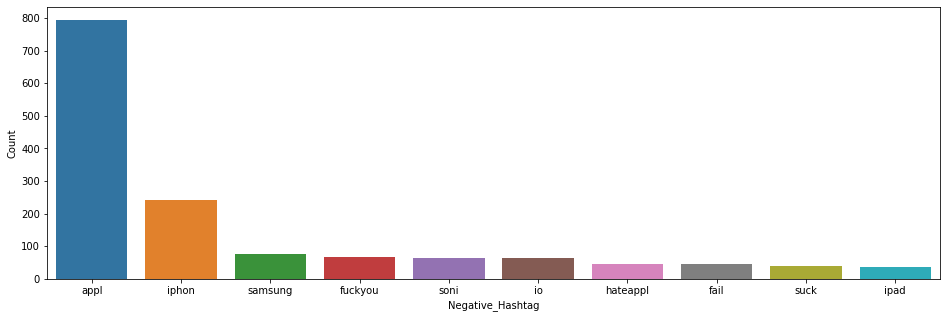

In [19]:
# NEGATIVE HASHTAGS FROM TWEETS
HT_negative = hashtag(new['clean_tweet'][new['label'] == 1])
HT_negative = sum(HT_negative,[])
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Negative_Hashtag': list(b.keys()), 'Count': list(b.values())})
# top 20 most frequent negative hashtags in the data
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Negative_Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [20]:
# FEATURE EXTRACTION MODEL : BOW- BAG OF WORDS
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(new['clean_tweet'])

In [21]:
# FEATURE EXTRACTION MODEL : TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(new['clean_tweet'])

In [22]:
# Predictive models( LOGISTIC REGRESSION FOR PREDICTION) on the tweet dataset using the two feature set — BOW and TF-IDF
# spilt dataset into training and testing of BOW model
train_bow = bow[:7920,:]
test_bow = bow[7920:,:]
train_bow

<7920x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 62717 stored elements in Compressed Sparse Row format>

In [23]:
# Splitting into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)
# LR Model trainiung
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) 

prediction = lreg.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int) # Calculating weighted f1 score
# score for bow is : 0.8061366806136679

C:\Users\AKSHIT\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8061366806136679

In [24]:
# saving the prediction in csv file as bow.csv
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('bow.csv', index=False)

In [25]:
#  similar checking LR model on TF-IDF feature
train_tfidf = tfidf[:7920,:]
test_tfidf = tfidf[7920:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)
## score for tfidf is : 0.817234190410007

0.817234190410007

In [26]:
# Saving data to a CSV file: tf_idf.csv
test_pred1 = lreg.predict_proba(test_tfidf)
test_pred_int1 = test_pred1[:,1] >= 0.3
test_pred_int1 = test_pred_int1.astype(np.int)
test['label'] = test_pred_int1
submission1 = test[['id','label']]
submission1.to_csv('tf_idf.csv', index=False) 

In [27]:
bow_file = pd.read_csv("bow.csv")
tfidf_file = pd.read_csv("tf_idf.csv")

In [28]:
bow_file

,id,label
0,7921,1
1,7922,1
2,7923,1
3,7924,1
4,7925,1
5,7926,0
6,7927,1
7,7928,0
8,7929,1
9,7930,0


In [29]:
tfidf_file

,id,label
0,7921,1
1,7922,1
2,7923,1
3,7924,1
4,7925,1
5,7926,0
6,7927,1
7,7928,0
8,7929,1
9,7930,0


In [30]:
# RESULT : TF_IDF GIVES BETTER F1 SCORE THAN BOW( BUT only few points of DIFFERENCE exists)